# Supervised Learning - Project

## Notebook by Julie Leung
### November 14, 2023

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for Shapiro-Wilks test, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import sklearn.metrics as sklm # for f1_score, recall_score, precision_score, r2_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

## Preliminary exploration of the dataset/dataframe

In [7]:
# Look at first 5 rows to see columns and type of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA: Look at dtypes, shape, describe(), and null values.

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.shape

(768, 9)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some Descriptive Stastistics Findings:
* Average Age of people in dataset: 33
* "Incidence" of Diabetes in dataset/sample: 0.35 (mean of Outcome which has 0 or 1)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Finding: There are no null values in this dataset.  Clearly the dataset provided for this project has already been cleaned to remove null values, from the original dataset.  Thanks, LHL! (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### EDA: Check for duplicates.

In [12]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Findings: No duplicate rows in the dataset.

### EDA: Is the data for Outcomes unbalanced?

In [13]:
# Is the data for outcomes unbalanced?
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<Axes: title={'center': 'Count of Number of Each Outcome'}, xlabel='Outcome', ylabel='count'>

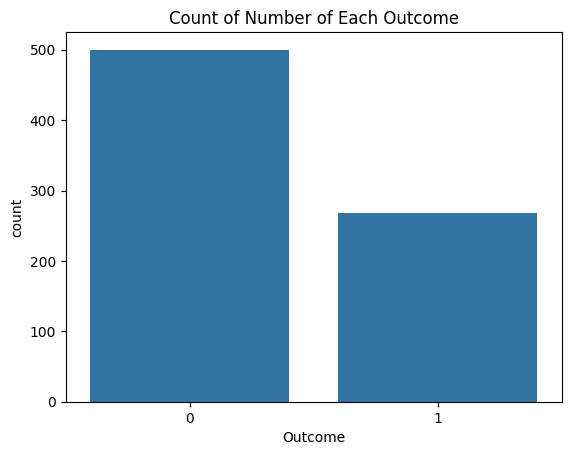

In [14]:
# Plot
plt.title('Count of Number of Each Outcome')
sns.countplot(x='Outcome',data=df)

Finding: The proportions of data for Outcome=0 vs. Outcome=1 is not 1:1, but it is not unbalanced.

An unbalanced dataset would be closer to 90:10 or 99:1 ratio whereas this is approximately 35%:65% ratio.  The data are not unbalanced, so no oversampling of the lower category, nor undersampling of the higher category, is required.

### EDA: How are predictor variables related to the target?  Create a correlation matrix to examine.

In [15]:
# Print Pearson R correlation matrix
corr_matrix = df.corr(method='pearson')
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
# Sort the correlations from highest to lowest, for 'Outcome' only.
corr_matrix[['Outcome']].unstack().sort_values(ascending=False)

Outcome  Outcome                     1.000000
         Glucose                     0.466581
         BMI                         0.292695
         Age                         0.238356
         Pregnancies                 0.221898
         DiabetesPedigreeFunction    0.173844
         Insulin                     0.130548
         SkinThickness               0.074752
         BloodPressure               0.065068
dtype: float64

In [17]:
# Visualize correlation matrix, which will show the correlations between the predictor variables with each other, and with the target ('Outcome')
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Finding: It appears that the strongest predictors (based on correlation value) for an Outcome=1 are, in order of strength:

| Rank | Feature | Correlation with Outcome |
|---|-----------------------------| -------- |
| 1 | Glucose                     | 0.466581
| 2 | BMI                         | 0.292695
| 3 | Age                         | 0.238356
| 4 | Pregnancies                 | 0.221898
| 5 | DiabetesPedigreeFunction    | 0.173844
| 6 | Insulin                     | 0.130548
| 7 | SkinThickness               | 0.074752
| 8 | BloodPressure               | 0.065068

Finding:  Correlation between predictor variables
* No strong appearance of multi-collinearity (which would be at the > 0.7 or > 0.8 value level), with the following mildly-strong correlation that could be kept in consideration when evaluating feature selection/model performance:
    - Between Age and Pregnancies (0.54)
    - Between SkinThickness and Insulin (0.44)
* The following have quite weak correlations (> 0.20):
    - Age and:
        - Pregnancies (0.54)
        - Glucose (0.26)
        - BloodPressure (0.24)
    - BMI and:
        - Glucose (0.22)
        - BloodPressure (0.28)
        - SkinThickness (0.39)
        - Insulin (0.20)
    - SkinThickness and:
        -  BloodPressure (0.21)

In [18]:
# Set up list of Predictor columns (everything minus 'Outcome')
predictors = df.columns[~df.columns.isin(['Outcome'])]
predictors

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
# Set up a diabetes_df and a nondiabetes_df:
diabetes_df = df[df['Outcome']==1]
nondiabetes_df = df[df['Outcome']==0]

### EDA: Show Distribution (Histogram) of Predictor variables

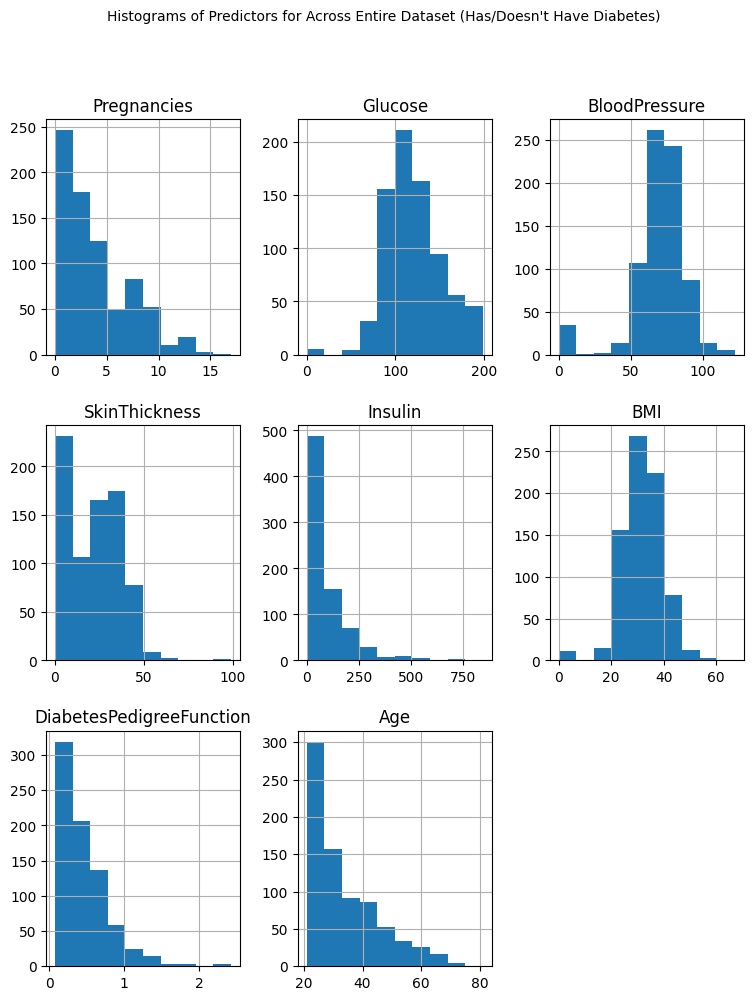

In [20]:
# Plot distributions of all numerical columns
df[predictors].hist(bins=10, figsize=(9, 11))
plt.suptitle('Histograms of Predictors for Across Entire Dataset (Has/Doesn\'t Have Diabetes)', fontsize=10)
plt.show()

Findings: Most Predictors do not appear to be normally distributed, using the eye (a Shapiro-Wilks test would need to be done to confirm).
* Glucose and Blood Pressure may be more normally-distributed

Need to exercise caution with use of any models that assume normal distribution of independent variables.

EDA: Check for normality with statistical test (Shapiro-Wilks)

In [21]:
# Check for normality via Shapiro-Wilks

for predictor in predictors:
    stat, p = stats.shapiro(df[predictor])
    print (f"{predictor}: Shapiro-Wilks test p-value={p}.  Data are{'' if round(p, 2) > 0.05 else ' **NOT**'} normally distributed.")

Pregnancies: Shapiro-Wilks test p-value=1.6100101271064348e-21.  Data are **NOT** normally distributed.
Glucose: Shapiro-Wilks test p-value=1.987464880170986e-11.  Data are **NOT** normally distributed.
BloodPressure: Shapiro-Wilks test p-value=1.5844936208677322e-28.  Data are **NOT** normally distributed.
SkinThickness: Shapiro-Wilks test p-value=1.751799708531821e-21.  Data are **NOT** normally distributed.
Insulin: Shapiro-Wilks test p-value=7.915339984765649e-34.  Data are **NOT** normally distributed.
BMI: Shapiro-Wilks test p-value=1.8407586602041262e-15.  Data are **NOT** normally distributed.
DiabetesPedigreeFunction: Shapiro-Wilks test p-value=2.4777990069755762e-27.  Data are **NOT** normally distributed.
Age: Shapiro-Wilks test p-value=2.401829612553989e-24.  Data are **NOT** normally distributed.


Finding:  All predictor variables are *NOT* normally distributed according to Shapiro-Wilks test.

Caution must be employed in utilizing any models or methods that assume normality in the predictor variables.

### Distribution of Predictor Variables / Normality for Outcome==0

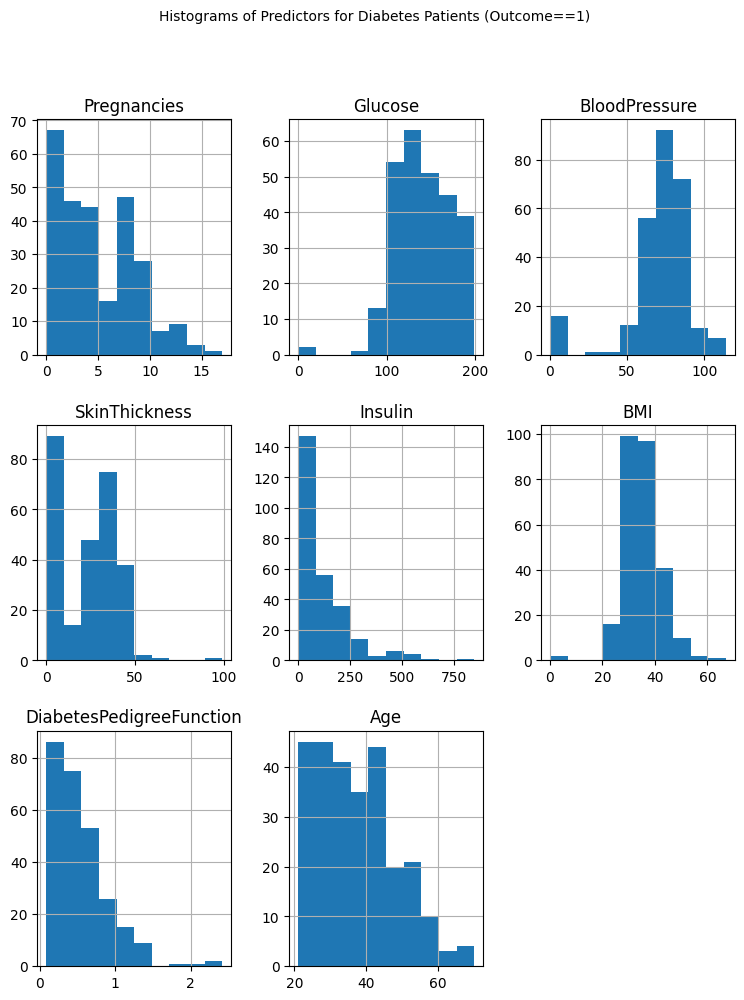

In [22]:
# Plot distributions of all numerical columns
diabetes_df[predictors].hist(bins=10, figsize=(9, 11))
plt.suptitle('Histograms of Predictors for Diabetes Patients (Outcome==1)', fontsize=10)
plt.show()

In [23]:
# Check for normality via Shapiro-Wilks

for predictor in predictors:
    stat, p = stats.shapiro(diabetes_df[predictor])
    print (f"{predictor} in Diabetes portion: Shapiro-Wilks test p-value={p}.  Data are{'' if round(p, 2) > 0.05 else ' **NOT**'} normally distributed.")

Pregnancies in Diabetes portion: Shapiro-Wilks test p-value=1.1574110558854045e-08.  Data are **NOT** normally distributed.
Glucose in Diabetes portion: Shapiro-Wilks test p-value=6.587056873286201e-07.  Data are **NOT** normally distributed.
BloodPressure in Diabetes portion: Shapiro-Wilks test p-value=1.6337663924074398e-18.  Data are **NOT** normally distributed.
SkinThickness in Diabetes portion: Shapiro-Wilks test p-value=2.409613578547437e-14.  Data are **NOT** normally distributed.
Insulin in Diabetes portion: Shapiro-Wilks test p-value=5.2971618914478737e-20.  Data are **NOT** normally distributed.
BMI in Diabetes portion: Shapiro-Wilks test p-value=4.3095851887109404e-10.  Data are **NOT** normally distributed.
DiabetesPedigreeFunction in Diabetes portion: Shapiro-Wilks test p-value=5.161224163438734e-15.  Data are **NOT** normally distributed.
Age in Diabetes portion: Shapiro-Wilks test p-value=2.0273873246878793e-07.  Data are **NOT** normally distributed.


### Distribution of Predictor Variables / Normality for Outcome==0

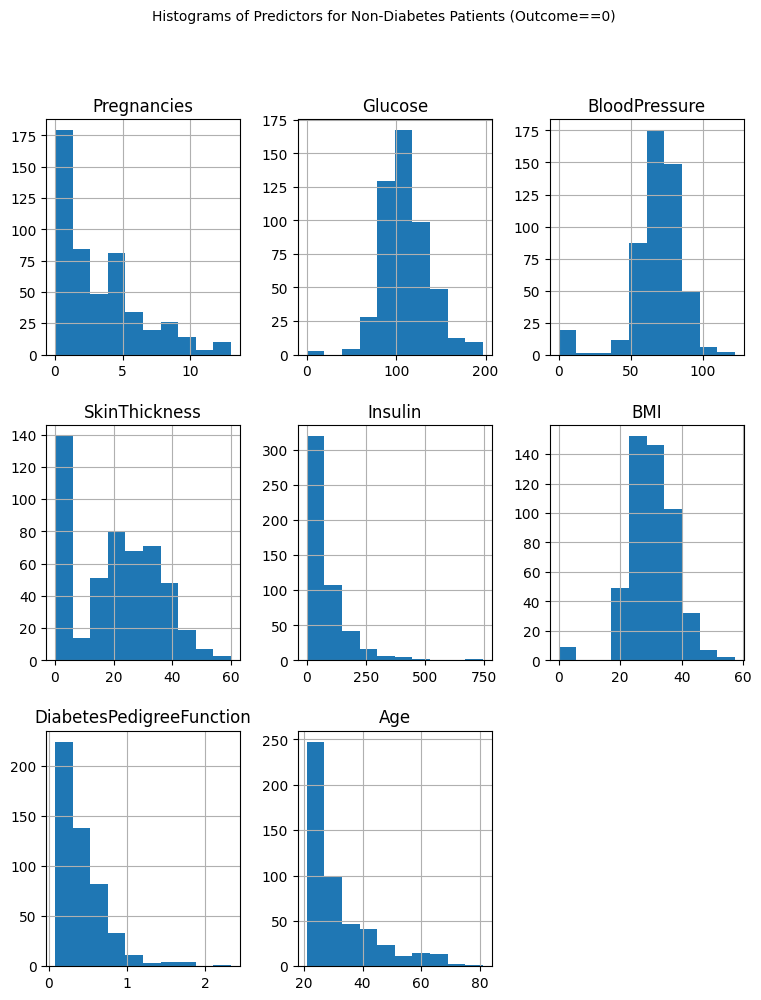

In [24]:
# Plot distributions of all numerical columns
nondiabetes_df[predictors].hist(bins=10, figsize=(9, 11))
plt.suptitle('Histograms of Predictors for Non-Diabetes Patients (Outcome==0)', fontsize=10)
plt.show()

In [25]:
# Check for normality via Shapiro-Wilks

for predictor in predictors:
    stat, p = stats.shapiro(nondiabetes_df[predictor])
    print (f"{predictor} in Non-Diabetes portion: Shapiro-Wilks test p-value={p}.  Data are{'' if round(p, 2) > 0.05 else ' **NOT**'} normally distributed.")

Pregnancies in Non-Diabetes portion: Shapiro-Wilks test p-value=2.6863900144305433e-19.  Data are **NOT** normally distributed.
Glucose in Non-Diabetes portion: Shapiro-Wilks test p-value=5.44710365701917e-09.  Data are **NOT** normally distributed.
BloodPressure in Non-Diabetes portion: Shapiro-Wilks test p-value=1.4436613998135717e-22.  Data are **NOT** normally distributed.
SkinThickness in Non-Diabetes portion: Shapiro-Wilks test p-value=1.0392320286454712e-15.  Data are **NOT** normally distributed.
Insulin in Non-Diabetes portion: Shapiro-Wilks test p-value=3.021948509012575e-28.  Data are **NOT** normally distributed.
BMI in Non-Diabetes portion: Shapiro-Wilks test p-value=6.530297678476737e-13.  Data are **NOT** normally distributed.
DiabetesPedigreeFunction in Non-Diabetes portion: Shapiro-Wilks test p-value=9.73381592512831e-23.  Data are **NOT** normally distributed.
Age in Non-Diabetes portion: Shapiro-Wilks test p-value=2.6708481417438164e-24.  Data are **NOT** normally di

### EDA: Compare means of each predictor variable between the two outcomes

In [26]:
# Compare means of each predictor variable between the two outcomes
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Finding:
* Average Glucose level:
    - With diabetes: 141.26
    - Without diabetes: 109.98
* Average BMI:
    - With diabetes: 35.14
    - Without diabetes: 30.30
* ... And onwards, per above table!


In [27]:
# Show barplot of Predictor Means on 'Outcome' categories:
# This was my original code, but the plots take up too much screen real-estate, so commenting out and doing a different way.
# for predictor in predictors:
#     plt.title(f'Comparison of Means of {predictor} between Outcomes (Diabetic | Not Diabetic)')
#     sns.barplot(data=df, x='Outcome', y=predictor)
#     plt.show()

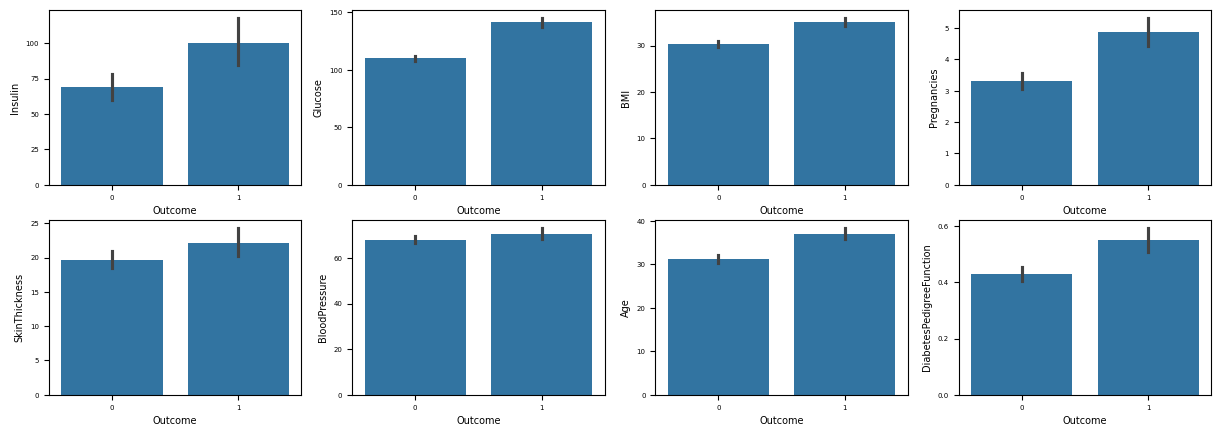

In [28]:
# Show barplot of Predictor Means on 'Outcome' categories on a singular figure
# Credit: https://medium.com/crossml/exploratory-data-analysis-eda-and-classification-on-pima-indian-diabetes-dataset-e4c649a666e9

#relation between each feature and the outcome variable by barplot..
plt.figure(figsize=(15,5))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='Outcome',y=col,)
 plt.xlabel('Outcome', fontsize=7)
 plt.xticks(fontsize=5)
 plt.ylabel(col,fontsize=7)
 plt.yticks(fontsize=5)

Finding: Means for predictor variables differ between Outcomes.  t-tests would be needed to confirm statistical significance.

### EDA: Draw Boxplots to eyeball outliers in predictor variables

In [29]:
# Traditional Boxplot - not using
#flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
#                  linestyle='none')
#for predictor in df.columns[~df.columns.isin(['Outcome'])]:
#    plt.figure()
#    df.boxplot([predictor], flierprops=flierprops)

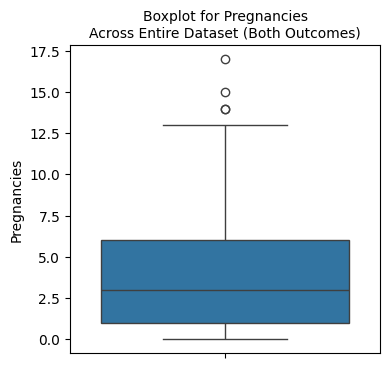

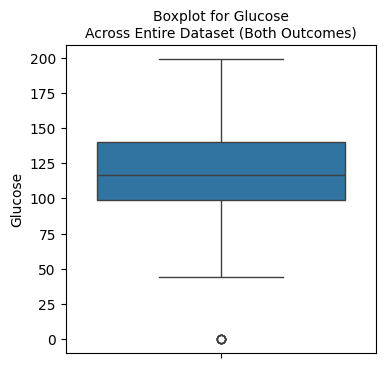

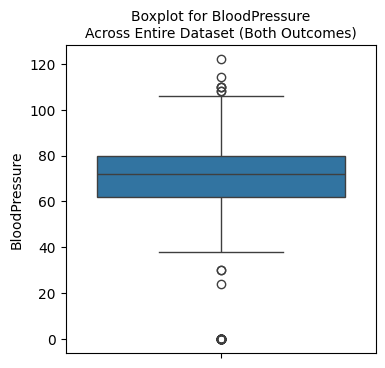

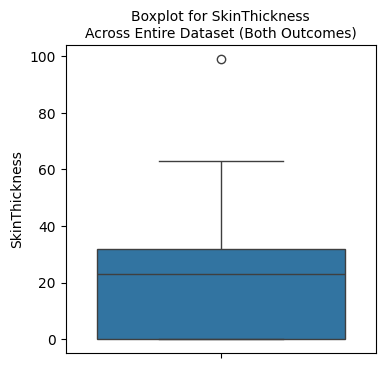

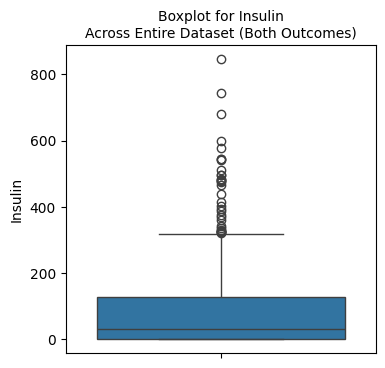

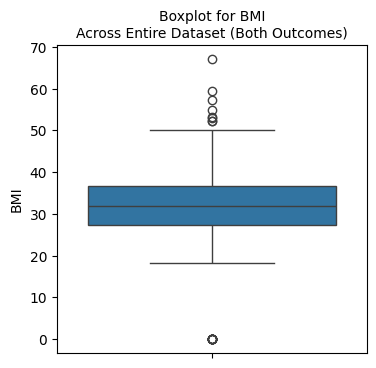

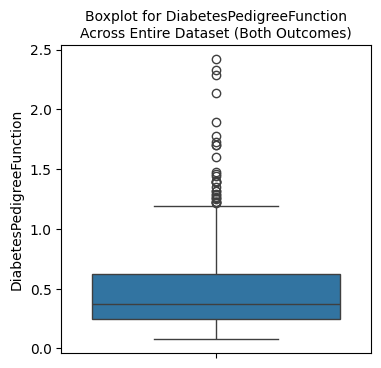

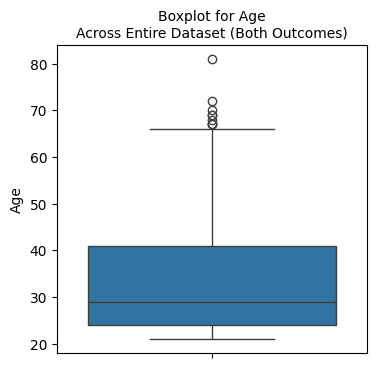

In [30]:
# Boxplots for all predictor variables across both Outcomes
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nAcross Entire Dataset (Both Outcomes)', fontsize=10)
    sns.boxplot(df[predictor])

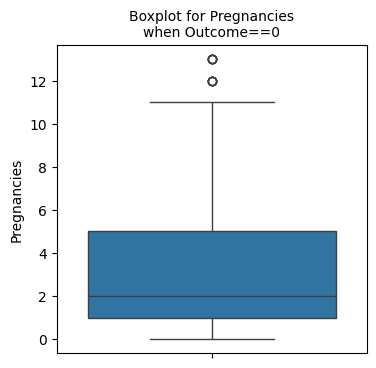

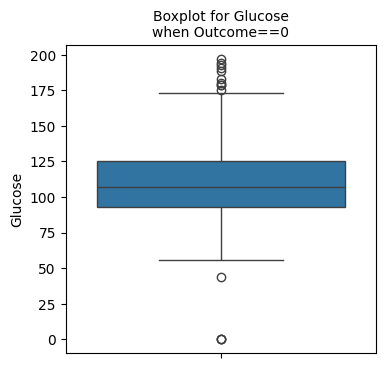

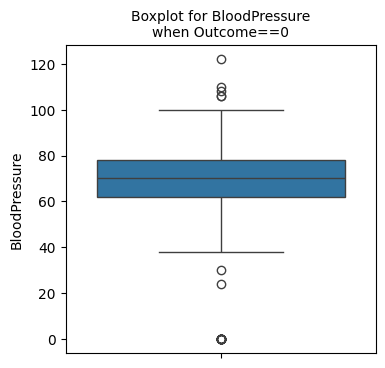

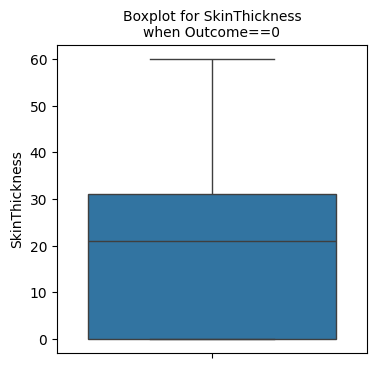

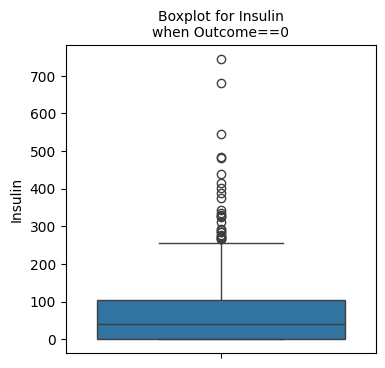

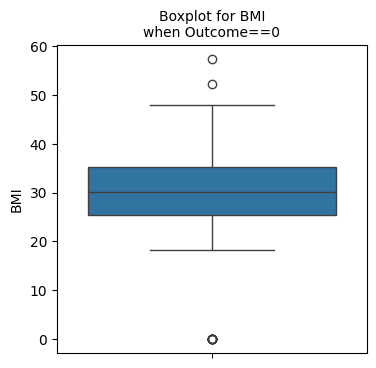

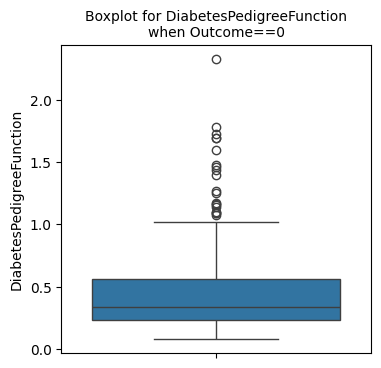

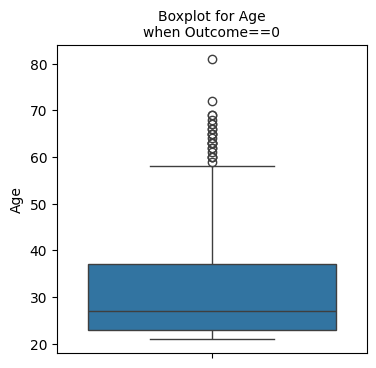

In [31]:
# Boxplots for all predictor variables when Outcome==0
mask = df['Outcome']==0
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nwhen Outcome==0', fontsize=10)
    sns.boxplot(df[mask][predictor])

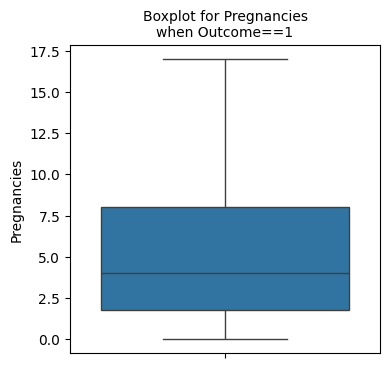

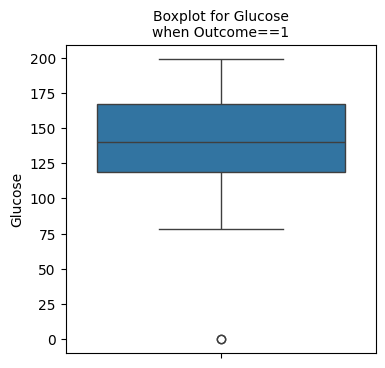

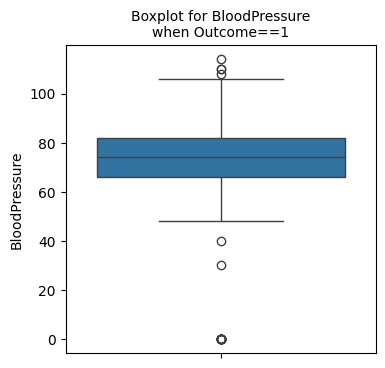

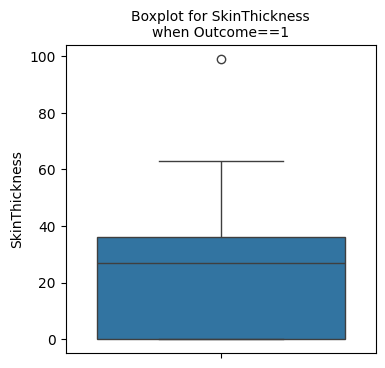

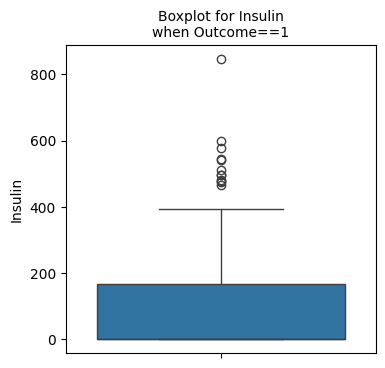

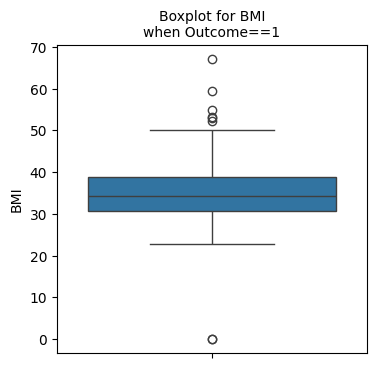

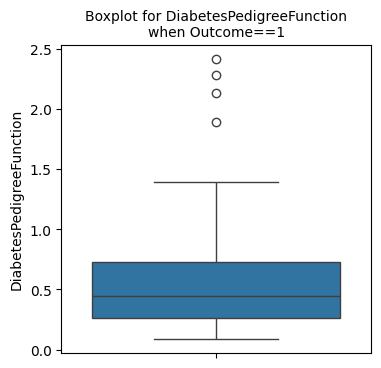

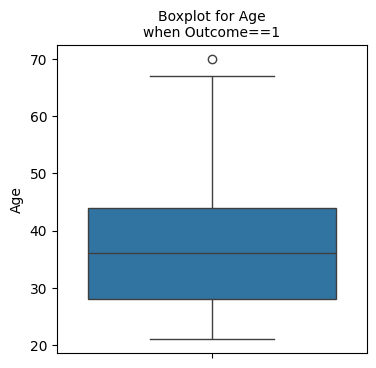

In [32]:
# Boxplots for all predictor variables when Outcome==1
mask = df['Outcome']==1
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nwhen Outcome==1', fontsize=10)
    sns.boxplot(df[mask][predictor])

In [33]:
# Define a function that will list out the passed in Series' Q1, Q3, IQR and count and values of outliers
# Best practise would be to put this in its own .py file (perhaps even in its own "OutlierUtilities" class),
#  and import file here, and instatntiate a OutlierUtils object to invoke method, but there is limited time to complete this project today so will not do.

def GetOutlierInfo(series):
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    med = np.median(series)
    iqr = q3 - q1
    outlierspread = 1.5*iqr
    upper = q3+(1.5*outlierspread)
    lower = q1-(1.5*outlierspread)

    outliers = series[(series <= lower) | (series >= upper)]
    print (f"q1 = {q1}, q3 = {q3}, iqr = {iqr}, outlier_spread = {outlierspread}, upperbound = {upper}, lowerbound = {lower}")
    print ("Outliers within the box plot are:\n{}".format(outliers))
    return outliers

In [34]:
# Get outlier print out for each Predictor
for predictor in predictors:
    print(f"\nFor Predictor {predictor}:")
    GetOutlierInfo(df[predictor])


For Predictor Pregnancies:
q1 = 1.0, q3 = 6.0, iqr = 5.0, outlier_spread = 7.5, upperbound = 17.25, lowerbound = -10.25
Outliers within the box plot are:
Series([], Name: Pregnancies, dtype: int64)

For Predictor Glucose:
q1 = 99.0, q3 = 140.25, iqr = 41.25, outlier_spread = 61.875, upperbound = 233.0625, lowerbound = 6.1875
Outliers within the box plot are:
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

For Predictor BloodPressure:
q1 = 62.0, q3 = 80.0, iqr = 18.0, outlier_spread = 27.0, upperbound = 120.5, lowerbound = 21.5
Outliers within the box plot are:
7        0
15       0
49       0
60       0
78       0
81       0
106    122
172      0
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
589      0
601      0
604      0
619      0
643      0
697      0
703      0
706      0
Name: Bloo

Findings:  There are outliers in many of the Predictor variables in the entire dataset, and also when partitioned by Outcome.

The concern about simply removing these outliers without domain knowledge is going to negatively impact the model, because if some of these outliers are important for their predictive ability, I might be significantly crippling the predictive power of my model.  Please see additional comments and rationale in the Data Preprocessing section below.

### EDA: Compare means of each predictor variable between the two outcomes

In [35]:
# Compare means of each predictor variable between the two outcomes
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [36]:
# Show barplot of Predictor Means on 'Outcome' categories:
# This was my original code, but the plots take up too much screen real-estate, so commenting out and doing a different way.
# for predictor in predictors:
#     plt.title(f'Comparison of Means of {predictor} between Outcomes (Diabetic | Not Diabetic)')
#     sns.barplot(data=df, x='Outcome', y=predictor)
#     plt.show()

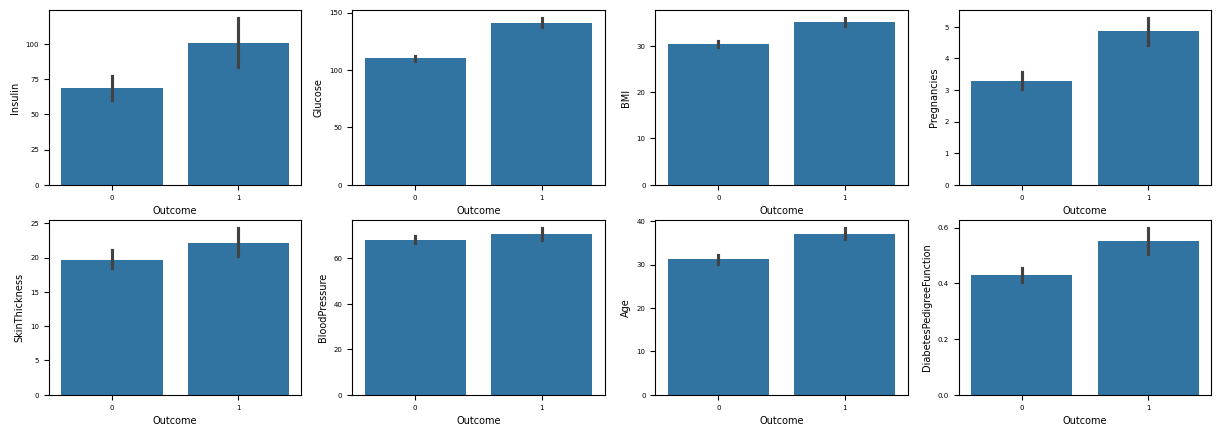

In [37]:
# Show barplot of Predictor Means on 'Outcome' categories on a singular figure
# Credit: https://medium.com/crossml/exploratory-data-analysis-eda-and-classification-on-pima-indian-diabetes-dataset-e4c649a666e9

#relation between each feature and the outcome variable by barplot..
plt.figure(figsize=(15,5))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='Outcome',y=col,)
 plt.xlabel('Outcome', fontsize=7)
 plt.xticks(fontsize=5)
 plt.ylabel(col,fontsize=7)
 plt.yticks(fontsize=5)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

### Comments:
* *Missing Values*:  There are no missing values in this dataset.  The .csv that was provided in the repository has clearly had null values removed or imputed prior to being handed over to us.  Thanks LHL!

* *Handling Outliers*:  EDA reveals outliers in a number of the Predictors (features), regardless of whether split by Outcome==0 or Outcome==1.  My concern with arbitrarily deciding to "Fix" this data (e.g. by replacing with the maximum or minimum value within IQR*1.5) or altogether dropping it, is that there may actually be predictive power in those outliers for certain (or all) features.  I will be relying upon the model selection to be one that is robust to outliers (i.e. Random Forest).  The logistic regression is not as resilient to outliers.

* *Scaling and Normalizing*:  Will use Standard Scaler from scikit-learn as a general catch-all.  Scaling data is important to improve efficiency of model building and use of the model for predictions.

* *Feature Engineering*:  No need to add more features at the moment, or "convert" column data to other data.  This dataset is fairly complete in terms of features.

* *Handling imbalanced data*:  As uncovered during EDA, this dataset is not unbalanced, with a ratio of about 35%:65% for the Outcome==1:Outcome==0 data.  We would need to oversample the lower count class if the ratio was closer to 1:99 or even 10:90, but not in this scenario.

In [38]:
# Prepare the X and y Numfrom the df
X = df[predictors].values
y = df['Outcome'].values

In [39]:
# Split the dataset into Training set and Test set, with shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)

In [40]:
# Apply the StandardScaler to the X_train and X_test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Comment on the Plan and Rationale:

#### I will train the following 2 (really, 3) models:
1. Logistic Regression (Binary Classification) - without Cross-Validation
2. Logistic Regression (Binary Classification) - with K-Folds Cross-Validation
3. Random Forest Classifier - with GridSearch CV including K-Folds and Hyperparameter Tuning

#### I will compare the model performance between 1, 2 and 3.

#### A Note about Not Tuning Hyperparameters for #1 and #2:
Logistic Regression doesn't really have that many hyperparameters to tune other than **c** which is involved in Regularization.  I will not use Regularization in this Project, as it has not been discussed at length in lectures up to this point).

## Logistic Regression - Regular with no Cross-Validation

In [41]:
# Perform a basic Logistic Regression
clf = LogisticRegression(random_state = 42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
# Get the predictions from X_test
y_pred = clf.predict(X_test)

In [43]:
# Get the Accuracy results
logistic_reg_regular_accuracy = accuracy_score(y_test, y_pred)
logistic_reg_regular_accuracy

0.7532467532467533

In [44]:
# Print out the Confusion Matrix, in a DF with labels
logistic_reg_regular_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
logistic_reg_regular_cm_df = pd.DataFrame(logistic_reg_regular_cm, index=['Actual Positive', 'Actual Negative'],
                                          columns=['Predicted Positive', 'Predicted Negative'])
print("Logistic Regression Regular with no Cross Validation Confusion Matrix:\n")
logistic_reg_regular_cm_df

Logistic Regression Regular with no Cross Validation Confusion Matrix:



,Predicted Positive,Predicted Negative
Actual Positive,37,18
Actual Negative,20,79


In [45]:
# Get the Classification Report (for F1, Recall, Precision scores nicely summarized)
logistic_reg_regular_cr = classification_report(y_test, y_pred)
print(f"Logistic Regression Regular with no Cross Validation Classification Report:\n\n{logistic_reg_regular_cr}")

Logistic Regression Regular with no Cross Validation Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [46]:
# Save/Print Scores not covered by Classification Report

logistic_reg_regular_recall_score = sklm.recall_score(y_test, y_pred)
logistic_reg_regular_f1_score = sklm.f1_score(y_test, y_pred)
#print (f"recall: {logistic_reg_regular_recall_score}")
#print (f"precision: {sklm.precision_score(y_test, y_pred)}")
#print (f"f1: {}")
print (f"Logistic Regression Regular roc_auc: {sklm.roc_auc_score(y_test, y_pred)}")

Logistic Regression Regular roc_auc: 0.7353535353535354


Findings:

1. The Accuracy score for a Logistic Regression is not the best indication of model performance for these reasons:
- Class Imbalance - In a "disease dataset", there typically is Class Imbalance (those diagnosed with the illness tend to be "fewer"), and Accuracy score tends to reflect this imbalance in the sample/population more than it reflects model performance.

2. Due to the fact this is a disease state prediction model, the **Recall** measure is most important.  We want to know what perceptage of the total truly positive cases, are predicted positive.

3. This model has a 0.67 Recall value.  We could do better.

4. This model's ROC_AUC score is 0.74 which is the degree of discrimination between positive and negative classes.

## Logistic Regression - Regular with no K-Folds Cross-Validation

We would expect a model trained with K-Folds Cross-Validation to have an increase in performance.  We are looking for an increase in the Recall value.

In [47]:
# Credit:  Code adapted from W08D05 lecture.ipynb (Ali El-Kassas and Eric Elmoznino) and discussion with Rohit Ranjan

clf2 = LogisticRegression(random_state=42, max_iter=1000)

# Collection of models
models = []

# Collection of model Recall scores
cv_recall_scores = []

# Collection of R^2 scores
cv_f1_scores = []

k_folds = 10
kf = KFold(n_splits=k_folds)
for train_idx, test_idx in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_idx,], X[test_idx], y[train_idx], y[test_idx]

    # Train the model and append to model collection
    models.append(clf2.fit(X_train, y_train))

    # Evaluate the model on the test set and append to recall_scores collection
    y_pred = clf2.predict(X_test)
    cv_recall_scores.append(sklm.recall_score(y_test, y_pred))
    cv_f1_scores.append(sklm.f1_score(y_test, y_pred))

In [48]:
# Print out the recall_scores and cv_rs2:
print (f"Recall Scores for all {len(cv_recall_scores)} models:\n{cv_recall_scores}")
print (f"\nF1 Scores for all {len(cv_f1_scores)} models:\n{cv_f1_scores}")

Recall Scores for all 10 models:
[0.5625, 0.5909090909090909, 0.6176470588235294, 0.5333333333333333, 0.5555555555555556, 0.5666666666666667, 0.6428571428571429, 0.64, 0.5, 0.6]

F1 Scores for all 10 models:
[0.6000000000000001, 0.65, 0.7, 0.5714285714285715, 0.6382978723404256, 0.68, 0.6000000000000001, 0.7111111111111111, 0.5581395348837209, 0.7058823529411764]


In [49]:
# Experiment - not as thorough evaluation as above code, commenting out
# from sklearn.model_selection import cross_val_score

# cross_val_scores = cross_val_score(clf2, X_train, y_train, cv=k_folds, scoring='recall')
# cross_val_scores

In [50]:
# Find the Model numbers where Recall and F1 scores are better than non-CV Logistic Regression
# Recall values were:
# logistic_reg_regular_recall_score
# logistic_reg_regular_f1_score

indices_higher_cv_recall_score = np.where(cv_recall_scores > logistic_reg_regular_recall_score)
indices_higher_cv_f1_score     = np.where(cv_f1_scores > logistic_reg_regular_f1_score)

print (f"Model indexes where the CV K-Folds Logistic Regression model had higher Recall Score than non-CV:\n{indices_higher_cv_recall_score}")
print (f"\nModel indexes where the CV K-Folds Logistic Regression model had higher F1 Score than non-CV:\n{indices_higher_cv_f1_score}")

Model indexes where the CV K-Folds Logistic Regression model had higher Recall Score than non-CV:
(array([], dtype=int64),)

Model indexes where the CV K-Folds Logistic Regression model had higher F1 Score than non-CV:
(array([2, 5, 7, 9], dtype=int64),)


Findings for TRAINING DATA using K-Folds (10) CV:

Surprisingly, K-Folds (10) cross-validation failed to achieve a Recall score better than singular Logistic Regression.

The F1 values (harmonized mean across Recall and Precision scores) from the K-Folds Cross-Validation, were better than the original, non-CV Logistic Regression's F1 score of 0.66, in 4 cases, though, for models in index 2, 5, 7 and 9.


### To make a apples to apples comparison, we will pick the best model from a Recall perspective, which corresponds to Recall score 0.642857 at index = 6, and run X_test data to get y_pred data.

Then, we will calculate Recall and F1 score from the Test data!

In [62]:
# Get the model out for best recall score (index 6)
logistic_cv_recall_best_model = models[6]

logistic_cv_recall_y_pred = logistic_cv_recall_best_model.predict(X_test)

# Calculate and display Recall and F1 scores
logistic_cv_recall_score = sklm.recall_score(y_test, logistic_cv_recall_y_pred)
logistic_cv_f1_score = sklm.f1_score(y_test, logistic_cv_recall_y_pred)

print (f"Logistic Regression using 10 k-folds CV scored on Recall: model's Recall Score = {logistic_cv_recall_score}")
print (f"\nLogistic Regression using 10 k-folds CV scored on F1: model's F1 Score = {logistic_cv_f1_score}")

Logistic Regression using 10 k-folds CV scored on Recall: model's Recall Score = 0.6

Logistic Regression using 10 k-folds CV scored on F1: model's F1 Score = 0.7058823529411764


Above, we have the Recall and F1 score from Test Data, using the best model trained on 10 k-fold CV on LogisticRegression when measured by training Recall score.

They are:
Recall: 0.6

F1:  0.7058823529411764

We will compare/discuss this result along with the other model performance results, at the end.

## Random Forest (Ensemble Method) - with K-Folds Cross-Validation and:
### a) Grid Search for Hyperparameter Tuning
### b) Randomized Search for Hyperparameter Tuning

In [51]:
# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

In [52]:
# Set up a parameter grid for the Grid Search to optimize via methodical trial and error on combinations
# Hyperparameter options documented here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# n_estimators:  Number of trees in the forest (default for RandomForestClassifier in sklearn 0.22 is 100)
# max_features:  Number of features to consider when looking for the best split:  'sqrt', 'log2', None  (If None, then use n_features of input X)
# max_depth:  Maximum depth of the tree.  If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split (default 2)
# criterion:  Function to measure the quality of a split:  'gini', 'entropy', 'log_loss'

# NOTE:  I'm setting up different combinations of parameters for Grid Search vs. Randomized Search because Grid is more computationally-heavy and I may not be able
# to test out all the hyperparams I want to, without risk of crashing my machine!

# Params for Grid Search
param_randomized = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Params for Grid Search
param_grid = {
    'n_estimators' : [100, 200],
    'max_features' : ['sqrt', 'log2'],
    'max_depth': [2, 9],
    'criterion': ['gini']
}

# k_folds for Grid Search
k_folds_rfc_grid = 5

# k_folds for Randomized Search
k_folds_rfc_randomized = 10


### For GridSearch
Recall Scoring

In [54]:
# Create GridSearchCV - for Scoring = Recall (for ease of use with rfc_cv_grid_recall.best_score_, .best_estimator_)

rfc_cv_grid_recall = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=k_folds_rfc_grid, scoring='recall', n_jobs=3)  # n_jobs=-1 means use all processors in parallel to speed up computation
rfc_cv_grid_recall.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='recall')

### For Randomized Search

Recall Scoring

In [55]:
# Create RandomizedSearchCV - Recall scoring

rfc_cv_rand_recall = RandomizedSearchCV(estimator=rfc, param_distributions=param_randomized, cv=k_folds_rfc_randomized, scoring='recall', n_jobs=2)  # n_jobs=2 means use 2 processors in parallel to speed up computation
rfc_cv_rand_recall.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='recall')

Now Gather the Recall Best Scores to display for:
1. GridSearch
2. RandomizedSearch

Gather the best estimator for:
3. GridSearch
4. RandomizedSearch

Get the #3 and #4 models to predict y_pred and calculate the recall and F1 scores from same, to compare to Logistic Regression models.

Let's start with GridSearch

In [56]:
# For GridSearch
rfc_cv_grid_recall.best_score_

0.5882978723404256

In [64]:
# Get the best estimator out of the GridSearch and run the predict() method on X_test to get y_pred, then figure out Recall and F1 scores
grid_recall_best_model = rfc_cv_grid_recall.best_estimator_

grid_recall_y_pred = grid_recall_best_model.predict(X_test)

# Calculate and display Recall and F1 scores
grid_recall_score = sklm.recall_score(y_test, grid_recall_y_pred)
grid_f1_score = sklm.f1_score(y_test, grid_recall_y_pred)

print (f"GridSearch using RFC with CV scored on Recall: Model's Recall Score = {grid_recall_score}")
print (f"\nGridSearch using RFC with CV scored on Recall: Model's F1 Score = {grid_f1_score}")

GridSearch using RFC with CV scored on Recall: Model's Recall Score = 0.6666666666666666

GridSearch using RFC with CV scored on Recall: Model's F1 Score = 0.7272727272727272


Next: RandomizedSearch

In [59]:
# For RandomizedSearch
rfc_cv_rand_recall.best_score_

0.5757246376811593

In [63]:
# Get the best estimator out of the RandomizedSearch and run the predict() method on X_test to get y_pred, then figure out Recall and F1 scores
rand_recall_best_model = rfc_cv_rand_recall.best_estimator_

rand_recall_y_pred = rand_recall_best_model.predict(X_test)

# Calculate and display Recall and F1 scores
rand_recall_score = sklm.recall_score(y_test, rand_recall_y_pred)
rand_f1_score = sklm.f1_score(y_test, rand_recall_y_pred)

print (f"RandomizedSearch using RFC with CV scored on Recall: Model's Recall Score = {rand_recall_score}")
print (f"\nRandomizedSearch using RFC with CV scored on Recall: Model's F1 Score = {rand_f1_score}")

RandomizedSearch using RFC with CV scored on Recall: Model's Recall Score = 0.6

RandomizedSearch using RFC with CV scored on Recall: Model's F1 Score = 0.6792452830188679


### Discussion of Results for the Training Section

Here are the results of the Training:
| Generic Model Name  | Cross-Validation Used                    | Hyper Parameters                                                                                                                                                                                                                 | Training Models Scored On      (Best Model Chosen by What Highest Measure?) | Training Recall Score Achieved | Peformance on Test Data:      Recall Score | Performance on Test Data:      F1 Score |
|---------------------|------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|--------------------------------|--------------------------------------------|-----------------------------------------|
|                     |                                          |                                                                                                                                                                                                                                  |                                                                             |                                |                                            |                                         |
| Logistic Regression | None                                     |                                                                                                                                                                                                                                  | N/A                                                                         | N/A                            | 0.67                                       | 0.66                                    |
| Logistic Regression | K-Folds (10 folds)                       |                                                                                                                                                                                                                                  | Recall                                                                      | 0.643                          | 0.6                                        | 0.706                                   |
| Random Forest       | K-Folds (5 folds) with GridSearch        | param_grid = {          'n_estimators' : [100,   200],          'max_features' : ['sqrt',   'log2'],          'max_depth': [2, 9],          'criterion': ['gini']      }                                                         | Recall                                                                      | 0.588                          | 0.667                                      | 0.727                                   |
| Random Forest       | K-Folds (10 folds) with RandomizedSearch | param_randomized = {          'n_estimators' : [100, 200, 300,   400, 500],          'max_features' : ['sqrt', 'log2',   None],          'max_depth': [3, 5, 10],          'criterion': ['gini', 'entropy',   'log_loss']      } | Recall                                                                      | 0.576                          | 0.6                                        | 0.679                                   |


Findings from Model Training:

* The plain-jane Logistic Regression with no cross-validation performed the best on Test data using Recall score (which we earlier decided was the most important performance measure for a "disease state" predictive model).

* When using F1 score on Test data as a measure, which is a harmonized mean of Recall and Precision, the Random Forest model performed best.

* For all CV models, the scoring method was "Recall" instead of Accuracy or Precision, again because this was earlier deemed the most important performance measure for a "disease state" predictive model.  Perhaps if "Accuracy" had been left as the scoring mechanism for the model selected from Training data, the performance measures or outcomes might have been different with Testing data.

* It was somewhat unsurprising that the GridSearch with definite inclusion of RandomForest max_depth of 9, did better even with fewer folds, than RandomizedSearch.

* It was an interesting discovery how much computation power/time was required for GridSearch, which meant its hyperparameters needed to be limited, so amount of tuning needed to be limited.  Had the same exhaustive list of hyperparmeters as given to RandomizedSearch had been given to GridSearch, it may well have had even higher performance statistics on Test data!

* I had expected that a Random Forest model would do better than Logistic Regression, and expected that especially with Cross-Validation and Hyperparameter Tuning thrown into the mix.  I was surprised that with all the extra computation effort and tuning, the Performance (Recall score) for Test data (0.667) was approximately the same as plain-jane basic Logistic Regression (0.67).  This speaks to the power of the Logistic Regression approach.  **However**, when looking at a blended measure of performance, the F1 score (blend between Recall and Precision), the Random Forest GridSearch method was highest of all at 0.727.  Undoubtedly, given more time, hyperparameters, and computational power, we may be able to get an even more performant model using the Random Forest with CV/Grid Search methodology.  It is very promising!

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* The best performing model (when using Recall as the primary performance measure, on Test data) was the regular, non-CV Logistic Regression.  This was somewhat unexpected given the extra cross-validation efforts and hyperparameter tuning available to the Random Forest approach.

* Random Forest with Grid Search seems promising, especially if:
    - Given more computational power and time, to allow more hyperparameters
    - A different metric is used to measure performance or "predictive accuracy" rather than Recall (such as F1 score)

* Chi-Squared statistical tests and feature selection methodologies are very likely to be valuable in order to slim down the features in this model, and potentially increase predictive power, performance and "accuracy".

* Though the dataset was not unbalanced, it might be interesting to attempt oversampling techniques to bolster the dataset and see if a better predictive model could be generated.